In [145]:
import time
import sys
sys.setrecursionlimit(9999999)

In [146]:
def get_inputs():
    df={}
    filenames = ["1000","5000","10000","20000","50000","75000","100000"]
    for filename in filenames:
        f=open("Data/{}.txt".format(filename), "r")
        df[filename] = []
        T = f.read()
        arr =[]
        T = T.replace('\t',',')
        T = T.replace('\n',',')
        T = T.split(',')
        del T[0]
        del T[len(T)-1]
        df[filename] = T
    return df

In [147]:
inputs = get_inputs()
print(inputs.keys())


dict_keys(['1000', '5000', '10000', '20000', '50000', '75000', '100000'])


### Check if inputs are not already sorted

In [148]:
for i in inputs.keys():
    flag = 0
    test_list1 = inputs[i][:] 
    test_list1.sort() 
    if (test_list1 == inputs[i]): 
        flag = 1
        
    # printing result 
    if (flag) : 
        print ("Yes, List is sorted.") 
    else : 
        print ("No, List is not sorted.") 

No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.


# Insertion Sort
Insertion sort is a simple sorting algorithm that works the way we sort playing cards in our hands.

### Time Complexity: 

Best: n

Average: n²

Worst: n²

### Space Complexity:

Worst: O(1)

In [149]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
      key = arr[i]
      j = i-1
      while j >=0 and key < arr[j] :
         arr[j+1] = arr[j]
         j -= 1
      arr[j+1] = key
    return arr

# QuickSort
Like QuickSort is a Divide and Conquer algorithm. It picks an element as pivot and partitions the given array around the picked pivot.

### Time complexity:

Best: n.log(n)

Average: n.log(n)

Worst: n²

### Space Complexity:

Worst: O(log(n))

In [150]:
def partition(arr, low, high):
    i = (low-1)
    pivot = arr[high]
    for j in range(low, high):
 
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
    return arr

# Tree Sort
Tree sort is a sorting algorithm that is based on Binary Search Tree data structure. It first creates a binary search tree from the elements of the input list or array and then performs an in-order traversal on the created binary search tree to get the elements in sorted order.

### Time complexity:

Best: n.log(n)

Average: n.log(n)

Worst: n²

### Space Complexity:

Worst: O(n)

In [151]:
class node():
    def __init__(self, val):
        self.val = val
        self.left = None 
        self.right = None 
    
    def insert(self,val):
        if self.val:
            if val < self.val:
                if self.left is None:
                    self.left = node(val)
                else:
                    self.left.insert(val)
            elif val > self.val:
                if self.right is None:
                    self.right = node(val)
                else:
                    self.right.insert(val)
        else:
            self.val = val

def inorder(root, res):

    if root:
        inorder(root.left,res)
        res.append(root.val)
        inorder(root.right,res)

def treesort(arr):

    if len(arr) == 0:
        return arr
    root = node(arr[0])
    for i in range(1,len(arr)):
        root.insert(arr[i])

    res = []
    inorder(root,res)
    return res

# TimSort
TimSort is a sorting algorithm based on Insertion Sort and Merge Sort. We divide the Array into blocks known as Run. We sort those runs using insertion sort one by one and then merge those runs using the combine function used in merge sort. 

### Time complexity:

Best: n

Average: n.log(n)

Worst: n²

### Space Complexity:

Worst: O(n)

In [152]:
MIN_MERGE = 32

def calcMinRun(n): 
	"""Returns the minimum length of a 
	run from 23 - 64 so that 
	the len(array)/minrun is less than or 
	equal to a power of 2. 

	e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33, 
	..., 127=>64, 128=>32, ... 
	"""
	r = 0
	while n >= MIN_MERGE: 
		r |= n & 1
		n >>= 1
	return n + r 

def insertionSort(arr, left, right): 
	for i in range(left + 1, right + 1): 
		j = i 
		while j > left and arr[j] < arr[j - 1]: 
			arr[j], arr[j - 1] = arr[j - 1], arr[j] 
			j -= 1


def merge(arr, l, m, r): 
	
	len1, len2 = m - l + 1, r - m 
	left, right = [], [] 
	for i in range(0, len1): 
		left.append(arr[l + i]) 
	for i in range(0, len2): 
		right.append(arr[m + 1 + i]) 

	i, j, k = 0, 0, l 
	
	while i < len1 and j < len2: 
		if left[i] <= right[j]: 
			arr[k] = left[i] 
			i += 1

		else: 
			arr[k] = right[j] 
			j += 1

		k += 1

	while i < len1: 
		arr[k] = left[i] 
		k += 1
		i += 1

	while j < len2: 
		arr[k] = right[j] 
		k += 1
		j += 1

def timSort(arr): 
	n = len(arr) 
	minRun = calcMinRun(n) 
	
	for start in range(0, n, minRun): 
		end = min(start + minRun - 1, n - 1) 
		insertionSort(arr, start, end) 

	size = minRun 
	while size < n: 
		
		for left in range(0, n, 2 * size): 

			mid = min(n - 1, left + size - 1) 
			right = min((left + 2 * size - 1), (n - 1)) 

			merge(arr, left, mid, right) 

		size = 2 * size 
	return arr


In [153]:
def check_sort(arr1,arr2):
    flag = 0
    test_list1 = arr2[:]
    test_list1.sort() 
    if (test_list1 == arr1): 
        flag = 1
        
    # printing result 
    if (flag) : 
        return 0
    else : 
        return -1

In [154]:
def insertion_time(input_s):
    start_time = time.time()
    arr = input_s[:]
    sort = insertion_sort(input_s[:])
    end_time = time.time() - start_time
    if check_sort(sort,arr) < 0:
        print("DEU BOZÓ AI MANO")
    return end_time

In [155]:
def tree_time(input_s):
    start_time = time.time()
    arr = input_s[:]
    sort = treesort(input_s[:])
    end_time = time.time() - start_time
    if check_sort(sort,arr) < 0:
        print("DEU BOZÓ AI MANO")
    return end_time

In [156]:
def quick_time(input_s):
    start_time = time.time()
    arr = input_s[:]
    sort = quickSort(input_s[:], 0,len(input_s)-1)
    end_time = time.time() - start_time
    if check_sort(sort,arr) < 0:
        print("DEU BOZÓ AI MANO")
    return end_time

In [157]:
def tim_time(input_s):
    start_time = time.time()
    arr = input_s[:]
    sort = timSort(input_s[:])
    end_time = time.time() - start_time
    if check_sort(sort,arr) < 0:
        print("Array already sorted")
    return end_time

In [158]:
keynames = ["1000","5000","10000","20000","50000","75000","100000"]
df = {}

In [159]:
for i in keynames:
    print(len(inputs[i]))

1000
5000
10000
20000
50000
75000
100000


In [160]:
df["quick"] = []
print("QUICK-1")
df["quick"].append(quick_time(inputs["1000"]))
print("QUICK-2")
df["quick"].append(quick_time(inputs["5000"]))
print("QUICK-3")
df["quick"].append(quick_time(inputs["10000"]))
print("QUICK-4")
df["quick"].append(quick_time(inputs["20000"]))
print("QUICK-5")
df["quick"].append(quick_time(inputs["50000"]))
print("QUICK-5")
df["quick"].append(quick_time(inputs["75000"]))
print("QUICK-7")
df["quick"].append(quick_time(inputs["100000"]))
with open('back1.csv', 'w') as f:
    for key in df.keys():
        f.write("%s,%s\n"%(key,df[key]))
print("WRITE QUICK")

QUICK-1
QUICK-2
QUICK-3
QUICK-4
QUICK-5
QUICK-5
QUICK-7
WRITE QUICK


In [161]:
df["insertion"] = []
print("INSER-1")
df["insertion"].append(insertion_time(inputs["1000"]))
print("INSER-2")
df["insertion"].append(insertion_time(inputs["5000"]))
print("INSER-3")
df["insertion"].append(insertion_time(inputs["10000"]))
print("INSER-4")
df["insertion"].append(insertion_time(inputs["20000"]))
print("INSER-5")
df["insertion"].append(insertion_time(inputs["50000"]))
print("INSER-6")
df["insertion"].append(insertion_time(inputs["75000"]))
print("INSER-7")
df["insertion"].append(-1)
with open('back2.csv', 'w') as f:
    for key in df.keys():
        f.write("%s,%s\n"%(key,df[key]))
print("WRITE INSER")

INSER-1
INSER-2
INSER-3
INSER-4
INSER-5
INSER-6
INSER-7
WRITE INSER


In [162]:
df["tree"] = []
print("TREE-1")
df["tree"].append(tree_time(inputs["1000"]))
print("TREE-2")
df["tree"].append(tree_time(inputs["5000"]))
print("TREE-3")
df["tree"].append(tree_time(inputs["10000"]))
print("TREE-4")
df["tree"].append(tree_time(inputs["20000"]))
print("TREE-5")
df["tree"].append(tree_time(inputs["50000"]))
print("TREE-6")
df["tree"].append(tree_time(inputs["75000"]))
print("TREE-7")
df["tree"].append(tree_time(inputs["100000"]))
with open('back3.csv', 'w') as f:
    for key in df.keys():
        f.write("%s,%s\n"%(key,df[key]))
print("WRITE TREE")

TREE-1
TREE-2
TREE-3
TREE-4
TREE-5
TREE-6
TREE-7
WRITE TREE


In [163]:

df["tim"] = []
print("tim-1")
df["tim"].append(tim_time(inputs["1000"]))
print("tim-2")
df["tim"].append(tim_time(inputs["5000"]))
print("tim-3")
df["tim"].append(tim_time(inputs["10000"]))
print("tim-4")
df["tim"].append(tim_time(inputs["20000"]))
print("tim-5")
df["tim"].append(tim_time(inputs["50000"]))
print("tim-6")
df["tim"].append(tim_time(inputs["75000"]))
print("tim-7")
df["tim"].append(tim_time(inputs["100000"]))
with open('Times.csv', 'w') as f:
    for key in df.keys():
        f.write("%s,%s\n"%(key,df[key]))
print("WRITE TIM")

tim-1
tim-2
tim-3
tim-4
tim-5
tim-6
tim-7
WRITE TIM


In [164]:
import matplotlib.pyplot as plt

In [165]:
df

{'quick': [0.006529569625854492,
  0.03132438659667969,
  0.06688928604125977,
  0.20180344581604004,
  0.35768961906433105,
  0.32702112197875977,
  0.526315450668335],
 'insertion': [0.10186052322387695,
  1.705592393875122,
  6.245033025741577,
  29.707839488983154,
  176.422057390213,
  437.20978832244873,
  -1],
 'tree': [0.03149914741516113,
  0.08063673973083496,
  0.10771799087524414,
  0.4043135643005371,
  0.7454485893249512,
  1.0322158336639404,
  1.5368125438690186],
 'tim': [0.011237621307373047,
  0.04139995574951172,
  0.08957314491271973,
  0.17411184310913086,
  0.4262077808380127,
  0.6624476909637451,
  0.9415647983551025]}

dict_keys(['quick', 'insertion', 'tree', 'tim'])


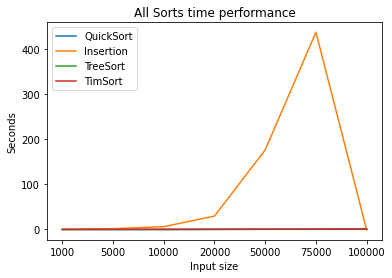

In [166]:
x1 = ["1000","5000","10000","20000","50000","75000","100000"]
keys = ["QuickSort", "Insertion", "TreeSort", "TimSort"]
print(df.keys())
for idx, key  in enumerate(df.keys()):
    if key != "Size":
        plt.plot(x1, df[key], label = keys[idx])

plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('All Sorts time performance')
plt.legend()

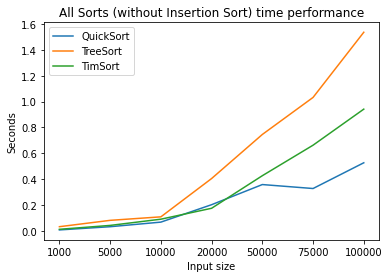

In [167]:
for idx, key  in enumerate(df.keys()):
    if key != "insertion" and key != "Size":
        plt.plot(x1, df[key], label = keys[idx])
plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('All Sorts (without Insertion Sort) time performance')
plt.legend()

Text(0.5, 1.0, 'QuickSort time performance')

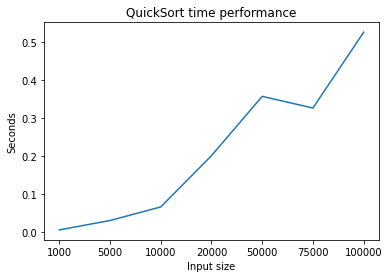

In [168]:
plt.plot(x1, df["quick"], label = "QuickSort")
plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('QuickSort time performance')

Text(0.5, 1.0, 'Insertion Sort time performance')

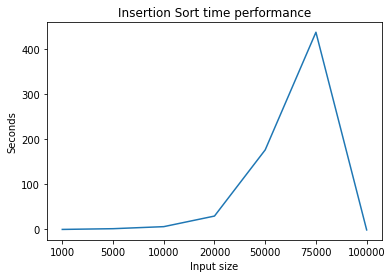

In [169]:
plt.plot(x1, df["insertion"], label = "Insertion Sort")
plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('Insertion Sort time performance')

Text(0.5, 1.0, 'TreeSort time performance')

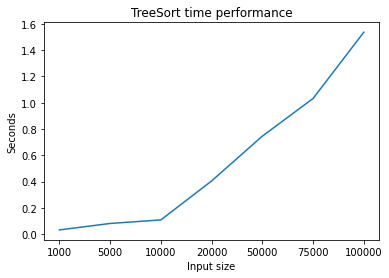

In [170]:
plt.plot(x1, df["tree"], label = "TreeSort")
plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('TreeSort time performance')

Text(0.5, 1.0, 'TimSort time performance')

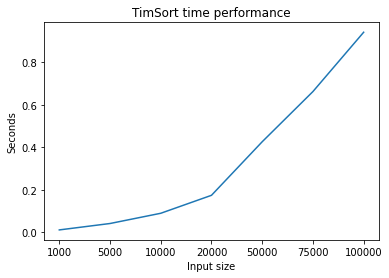

In [171]:
plt.plot(x1, df["tim"], label = "TimSort")
plt.xlabel('Input size')
plt.ylabel('Seconds')
plt.title('TimSort time performance')

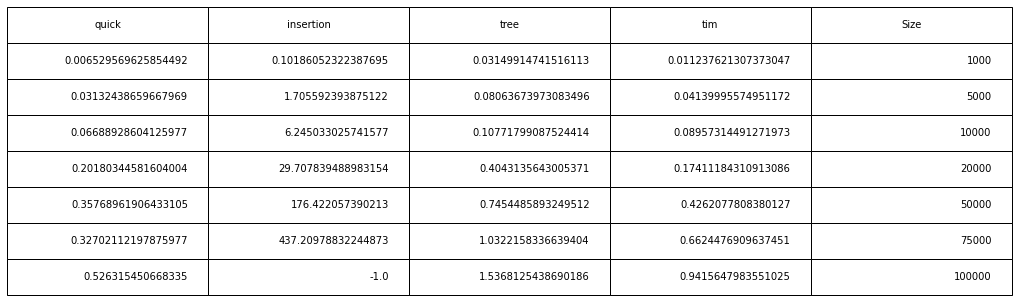

In [172]:
import pandas as pd

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df["Size"] = ["1000","5000","10000","20000","50000","75000","100000"]
dataframe = pd.DataFrame.from_dict(df)

table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, loc='center')
table.scale(3, 3)
fig.tight_layout()

plt.show()

In [173]:
for i in inputs.keys():
    flag = 0
    test_list1 = inputs[i][:] 
    test_list1.sort() 
    if (test_list1 == inputs[i]): 
        flag = 1
        
    # printing result 
    if (flag) : 
        print ("Yes, List is sorted.") 
    else : 
        print ("No, List is not sorted.") 

No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.
No, List is not sorted.


# Worst case QuickSort

Leftmost (or rightmost) element is chosen as pivot, 

1) Array is already sorted in same order.

2) Array is already sorted in reverse order.

3) All elements are same (special case of case 1 and 2)

In [174]:
arr = []
for i in range(1000):
    arr.append(1)
print("All elementes are same {}".format(quick_time(arr)))
arr = []
for i in range(1000):
    arr.append(1000-i)
print("Array is already sorted in reverse order. {}".format(quick_time(arr)))
arr = []
for i in range(1000):
    arr.append(i)
print("Array is already sorted in same order. {}".format(quick_time(arr)))
print("Array is unsorted {}".format(quick_time(inputs["1000"])))

All elementes are same 0.20649147033691406
Array is already sorted in reverse order. 0.09225893020629883
Array is already sorted in same order. 0.10510516166687012
Array is unsorted 0.005391597747802734


# Worst case Insertion Sort

The worst case of insertion sort occours when the array is sorted in reversed order

In [175]:
arr = [1000-i for i in range(1,1001)]
print("Array is already sorted in reverse order. {}".format(insertion_time(arr)))
print("Array is unsorted {}".format(insertion_time(inputs["1000"])))

Array is already sorted in reverse order. 0.1551990509033203
Array is unsorted 0.050801753997802734


# Worst case Tree Sort
The worst case of insertion sort occours when the array is already sorted.

In [176]:
arr = []
for i in range(1,1001):
    arr.append(i)
print("Array is already sorted. {}".format(tree_time(arr)))
print("Array is unsorted {}".format(tree_time(inputs["1000"])))

Array is already sorted. 0.24724316596984863
Array is unsorted 0.00477147102355957


# Worst case Tim Sort

I was unable to identify the Tim Sort worst case, but because the Tim sort is a junction of inser+merge sort, we can observe if both worts cases do make the algorithm slower.

In [178]:
arr = []
for i in range(1,1001):
    if i%2:
        arr.append(1000-(i+3))
    else:
        arr.append(1000-(i))
print("Array is organized in a weird way (Merge Sort Worst Case). {}".format(tim_time(arr)))
arr = [1000-i for i in range(1,1001)]
print("Array is already sorted in reverse order (Insertion Sort Worst Case). {}".format(tim_time(arr)))
print("Array is unsorted {}".format(tim_time(inputs["1000"])))

Array is organized in a weird way (Merge Sort Worst Case). 0.014617443084716797
Array is already sorted in reverse order (Insertion Sort Worst Case). 0.007548332214355469
Array is unsorted 0.0054781436920166016
